In [24]:
import pandas as pd 

In [25]:
import pandas as pd
import re

archivo_csv = '../data/datos_champions.csv'

# Cargar el archivo CSV
df = pd.read_csv(archivo_csv)

# Eliminar filas completamente vacías
df.dropna(how='all', inplace=True)

# Función para quitar prefijos basado en una lista de códigos de países conocidos
def quitar_prefijos(nombre, prefijos):
    if pd.isnull(nombre):
        return nombre  # Retorna el valor NaN sin cambios
    # Quitar prefijo al inicio
    for prefijo in prefijos:
        if nombre.lower().startswith(prefijo):
            nombre = re.sub(f'^{prefijo}', '', nombre, flags=re.IGNORECASE).strip()
            break  # Si se encuentra y quita un prefijo, no se necesita seguir buscando
    # Quitar prefijo al final (ajustar si es necesario)
    for prefijo in prefijos:
        if nombre.lower().endswith(prefijo):
            nombre = re.sub(f'{prefijo}$', '', nombre, flags=re.IGNORECASE).strip()
            break  # Si se encuentra y quita un prefijo, no se necesita seguir buscando
    return nombre

# Lista de prefijos conocidos que deseas eliminar (en minúsculas)
prefijos = ['eng', 'es', 'fr', 'it', 'de', 'pt', 'ru', 'cz', 'nl', 'gr', 'sc', 'sw', 'tr', 'uk', 'be', 'pl', 'ro', 'ie', 'al', 'at', 'bg', 'ch', 
            'cy', 'dk', 'fi', 'hr', 'hu', 'is', 'lt', 'lv', 'mk', 'mt', 'no', 'rs', 'se', 'si', 'sk', 'ua', 'ar', 'bo', 'br', 'cl', 'co', 
            'ec', 'mx', 'py', 'pe', 'uy', 've', 'ca', 'us', 'cn', 'jp', 'kr', 'au', 'nz', 'in', 'id', 'my', 'ph', 'sg', 'th', 'vn', 'ae',
              'sa', 'il', 'eg', 'ma', 'za', 'dz', 'tn', 'ma', 'sn', 'cm', 'ci', 'gh', 'ng', 'ke', 'ug', 'za', 'et', 'sd', 'so', 'ly', 'mr',
                'gm', 'gw', 'lr', 'sl', 'bf', 'ne', 'tg', 'bj', 'cv', 'st', 'gq', 'ga', 'cg', 'cd', 'cf', 'td', 'cm']

# Aplicar la función para quitar prefijos en las columnas 'Home' y 'Away'
df['Home'] = df['Home'].apply(lambda x: quitar_prefijos(x, prefijos))
df['Away'] = df['Away'].apply(lambda x: quitar_prefijos(x, prefijos))



In [26]:
#Borramos ahora aquellas filas que el unico dato que se tienen es de 'season'

filas_a_eliminar = df[df.isnull().sum(axis=1) >= (len(df.columns) - 1)].index

# Eliminar esas filas
df.drop(filas_a_eliminar, inplace=True)


In [27]:

# La primera fila es el encabezado, así que la guardamos para comparaciones
encabezado = df.columns.tolist()

# Función para detectar filas que son como el encabezado pero con un año en la primera columna
def es_fila_encabezado_con_anio(fila):
    # Comparamos cada elemento de la fila con el encabezado, excepto el primero
    return all(fila[i] == encabezado[i] for i in range(1, len(encabezado)))

# Identificamos las filas que cumplen con esta condición
filas_a_eliminar = [i for i, fila in df.iterrows() if es_fila_encabezado_con_anio(fila)]

# Eliminamos estas filas del DataFrame
df.drop(index=filas_a_eliminar, inplace=True)

# Guardamos el DataFrame limpio, manteniendo el encabezado
df.to_csv('../data/datos_champions_limpio.csv', index=False)



In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 574 entries, 0 to 652
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Season        574 non-null    object
 1   Round         574 non-null    object
 2   Day           574 non-null    object
 3   Date          574 non-null    object
 4   Time          255 non-null    object
 5   Home          574 non-null    object
 6   Score         574 non-null    object
 7   Away          574 non-null    object
 8   Attendance    214 non-null    object
 9   Venue         574 non-null    object
 10  Referee       574 non-null    object
 11  Match Report  574 non-null    object
 12  Notes         553 non-null    object
dtypes: object(13)
memory usage: 62.8+ KB


In [29]:
print(df.columns)


Index(['Season', 'Round', 'Day', 'Date', 'Time', 'Home', 'Score', 'Away',
       'Attendance', 'Venue', 'Referee', 'Match Report', 'Notes'],
      dtype='object')


In [30]:
# Borramos las columnas que no necesitamos para el análisis
columns_to_drop = ['Time', 'Attendance', 'Notes', 'Match Report', 'Referee', 'Venue']

# Eliminar las columnas
df.drop(columns=columns_to_drop, inplace=True)

# Verificar los datos después de la limpieza
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 574 entries, 0 to 652
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Season  574 non-null    object
 1   Round   574 non-null    object
 2   Day     574 non-null    object
 3   Date    574 non-null    object
 4   Home    574 non-null    object
 5   Score   574 non-null    object
 6   Away    574 non-null    object
dtypes: object(7)
memory usage: 35.9+ KB


Como vemos tenemos datos de tipo objeto así que lo que haremos es convertir estos a enteros para poder trabajar con ellos en modelos de aprendizaje

In [31]:
print(df['Score'].value_counts())


Score
1–0          66
1–1          51
0–0          44
2–1          44
2–0          40
0–1          39
0–2          32
3–1          30
1–2          29
3–0          24
2–2          21
1–3          18
2–3          15
4–0          15
0–3          14
3–2          13
4–1          13
4–2           7
1–4           5
7–0           4
5–1           4
7–1           4
0–4           3
0–5           3
5–2           3
4–3           2
2–4           2
6–1           2
2–5           2
3–4           2
3–3           2
5–0           2
4–4           1
2–8           1
7–2           1
(4)1–1(2)     1
1–5           1
5–3           1
(5)1–1(3)     1
(8)0–0(7)     1
(2)3–3(3)     1
(3)1–0(2)     1
(4)1–0(1)     1
1–6           1
(2)3–2(3)     1
(1)1–0(4)     1
(3)1–1(4)     1
(1)2–1(3)     1
(6)1–0(7)     1
(4)1–0(3)     1
(6)1–1(5)     1
Name: count, dtype: int64


Parece que la mayoría de las entradas siguen el formato esperado de "home_goals-away_goals". Sin embargo, hay algunas entradas que tienen un formato diferente, como "(6)1-0(7)" o "(4)1-0(3)".

In [32]:
import pandas as pd
import re

# Simulando la carga de tu DataFrame (reemplaza esto con la carga de tu archivo CSV)
# df = pd.read_csv('tu_archivo.csv')

# Convertir la columna 'Date' a datetime
df['Date'] = pd.to_datetime(df['Date'])

# Codificar la columna 'Round' como variables dummy
round_dummies = pd.get_dummies(df['Round'], prefix='Round')
df = pd.concat([df, round_dummies], axis=1)

# Función ajustada para extraer goles
def extract_goals(text):
    # Primero, intentamos extraer resultados que incluyen penales
    match_penalties = re.match(r".*\((\d+)\).*–.*\((\d+)\)", text)
    if match_penalties:
        # Si hay resultados de penales, estos son los resultados "definitivos"
        return int(match_penalties.group(1)), int(match_penalties.group(2))
    
    # Si no hay penales, buscamos el resultado del tiempo regular
    match_regular = re.match(r"(\d+)–(\d+)", text)
    if match_regular:
        return int(match_regular.group(1)), int(match_regular.group(2))
    
    # Si no se encuentra ningún formato conocido, retornamos None para indicar datos faltantes
    return None, None

# Aplicar la función ajustada
df['HomeGoals'], df['AwayGoals'] = zip(*df['Score'].map(extract_goals))

# Eliminar las columnas originales que ya no se necesitan
df.drop(['Round', 'Score'], axis=1, inplace=True)

# Nota: En este punto, no rellenaremos los NaN con ceros como antes.

# Solo convertimos a enteros las filas que no son NaN
# Esto requiere manejar los NaN de manera diferente, por ejemplo, manteniéndolos como NaN o usando un marcador especial para los datos faltantes.

# Muestra la información del DataFrame para verificar los cambios
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 574 entries, 0 to 652
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Season                574 non-null    object        
 1   Day                   574 non-null    object        
 2   Date                  574 non-null    datetime64[ns]
 3   Home                  574 non-null    object        
 4   Away                  574 non-null    object        
 5   Round_Final           574 non-null    bool          
 6   Round_Quarter-finals  574 non-null    bool          
 7   Round_Round of 16     574 non-null    bool          
 8   Round_Semi-finals     574 non-null    bool          
 9   HomeGoals             574 non-null    int64         
 10  AwayGoals             574 non-null    int64         
dtypes: bool(4), datetime64[ns](1), int64(2), object(4)
memory usage: 38.1+ KB


             Team  ChampionshipsWon
0       Barcelona                 4
1     Real Madrid                 3
2       Liverpool                 2
3         Chelsea                 2
4     Bayern Muni                 2
5       Real Madr                 2
6           Porto                 1
7           Milan                 1
8    nchester Utd                 1
9           Inter                 1
10  nchester City                 1


C:\Users\albab\AppData\Local\Temp\ipykernel_25316\611854147.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  finals['Winner'] = finals.apply(lambda row: row['Home'] if row['HomeGoals'] > row['AwayGoals'] else row['Away'], axis=1)


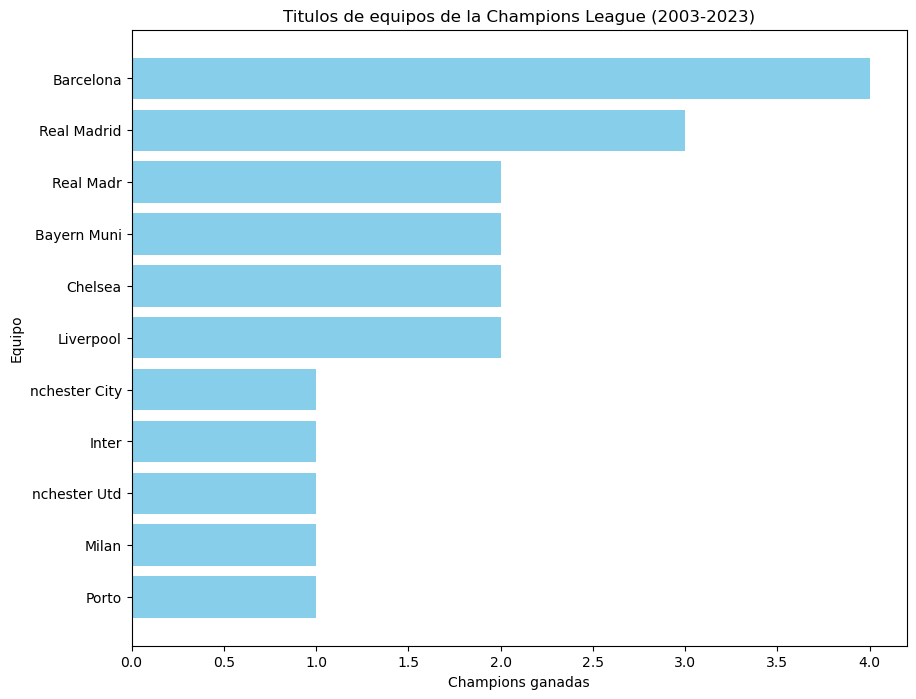

FileNotFoundError: [Errno 2] No such file or directory: 'imagenes/titulos_equipos.png'

<Figure size 640x480 with 0 Axes>

In [33]:
#AQUI ESTAMOS MOSTRANDO LAS LIGAS QUE SE HAN GANDADO DESDE 2003 HASTA 2023

# Filtramos solo las finales
finals = df[df['Round_Final']]

# Determinamos el ganador de cada final
finals['Winner'] = finals.apply(lambda row: row['Home'] if row['HomeGoals'] > row['AwayGoals'] else row['Away'], axis=1)

# Contamos cuántas veces cada equipo ha ganado
champions_count = finals['Winner'].value_counts().reset_index()
champions_count.columns = ['Team', 'ChampionshipsWon']

print(champions_count)

#Lo graficamos
import matplotlib.pyplot as plt

# Ordenar los datos para la visualización
champions_count.sort_values('ChampionshipsWon', ascending=True, inplace=True)

# Crear la gráfica
plt.figure(figsize=(10, 8))
plt.barh(champions_count['Team'], champions_count['ChampionshipsWon'], color='skyblue')
plt.xlabel('Champions ganadas')
plt.ylabel('Equipo')
plt.title('Titulos de equipos de la Champions League (2003-2023)')
plt.show()

#Guardamos la gráfica
plt.savefig('imagenes/titulos_equipos.png')



In [ ]:
df.describe()




,Date,HomeGoals,AwayGoals
count,574,574.000000,574.000000
mean,2013-08-29 16:30:56.445992960,1.672474,1.216028
min,2004-02-24 00:00:00,0.000000,0.000000
25%,2008-05-05 06:00:00,1.000000,0.000000
50%,2013-04-27 00:00:00,1.000000,1.000000
75%,2018-04-20 18:00:00,2.000000,2.000000
max,2023-06-10 00:00:00,8.000000,8.000000
std,NaN,1.513422,1.251326


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np

# Asumiendo que 'df' es tu DataFrame que contiene los datos de la Champions League

# Preparando las características y la variable objetivo
X = df.drop(['Date', 'HomeGoals', 'AwayGoals'], axis=1)  # Excluyendo la fecha y los goles (variables objetivo)
y = df['HomeGoals']

# Definiendo las columnas para la codificación One-Hot
categorical_features = ['Season', 'Day', 'Home', 'Away']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Preprocesador para transformar las características categóricas
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)
    ])

# Creando el pipeline de regresión lineal con preprocesamiento
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())])

# Dividiendo los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenando el modelo
model.fit(X_train, y_train)

# Haciendo predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calculando el RMSE para evaluar el modelo
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")


RMSE: 1.5833981903898158


In [ ]:
y_train

206    3
71     2
178    2
68     1
15     1
      ..
79     4
119    2
306    3
495    0
114    1
Name: HomeGoals, Length: 459, dtype: int64

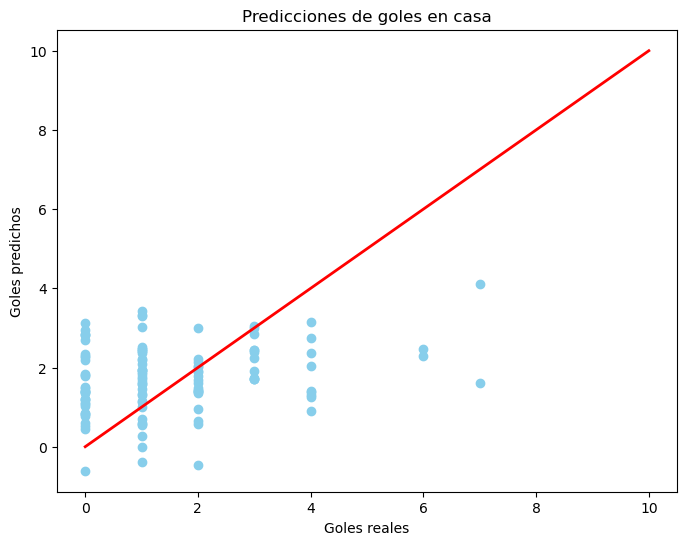

<Figure size 640x480 with 0 Axes>

In [ ]:
# Grafica de dispersión con la línea de regresión
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='skyblue')
plt.plot([0, 10], [0, 10], color='red', linewidth=2)
plt.xlabel('Goles reales')
plt.ylabel('Goles predichos')
plt.title('Predicciones de goles en casa')
plt.show()
plt.savefig('imagenes/prediccion_goles.png')


In [ ]:

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Asumiendo X son tus características seleccionadas y estandarizadas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[['HomeGoals', 'AwayGoals']])  # Ejemplo con goles

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)


c:\Users\albab\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\albab\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [ ]:
#K-MEAN
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Asumiendo X son tus características seleccionadas y estandarizadas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[['HomeGoals', 'AwayGoals']])  # Ejemplo con goles

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)


c:\Users\albab\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\albab\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [ ]:
#mean_shift
from sklearn.cluster import MeanShift

mean_shift = MeanShift()
clusters_mean_shift = mean_shift.fit_predict(X_scaled)


In [ ]:
#DBSCAN
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters_dbscan = dbscan.fit_predict(X_scaled)


In [ ]:
#GMM
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3, random_state=42)
clusters_gmm = gmm.fit_predict(X_scaled)


c:\Users\albab\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [ ]:
#Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering

agglomerative = AgglomerativeClustering(n_clusters=3)
clusters_agg = agglomerative.fit_predict(X_scaled)


SERIES TEMPORALES


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd

# Asumiendo que df está ordenado por fecha y tiene una columna 'HomeGoals'
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

model_arima = ARIMA(df['HomeGoals'].dropna(), order=(1, 1, 1))
model_arima_fit = model_arima.fit()


c:\Users\albab\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\albab\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\albab\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


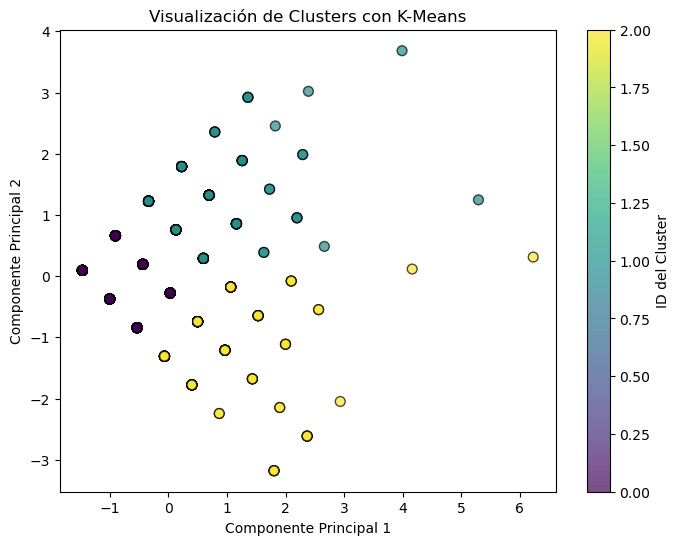

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reducir datos a 2 dimensiones para visualización
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Graficar los clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', marker='o', edgecolor='k', s=50, alpha=0.7)
plt.title('Visualización de Clusters con K-Means')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(label='ID del Cluster')
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Asumiendo que ya has creado características basadas en la serie temporal
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


ValueError: could not convert string to float: '2009-2010'